# K-Means Clustering

"K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes."

"You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid."


## QSAR Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [2]:
data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
data.pop(1024) #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


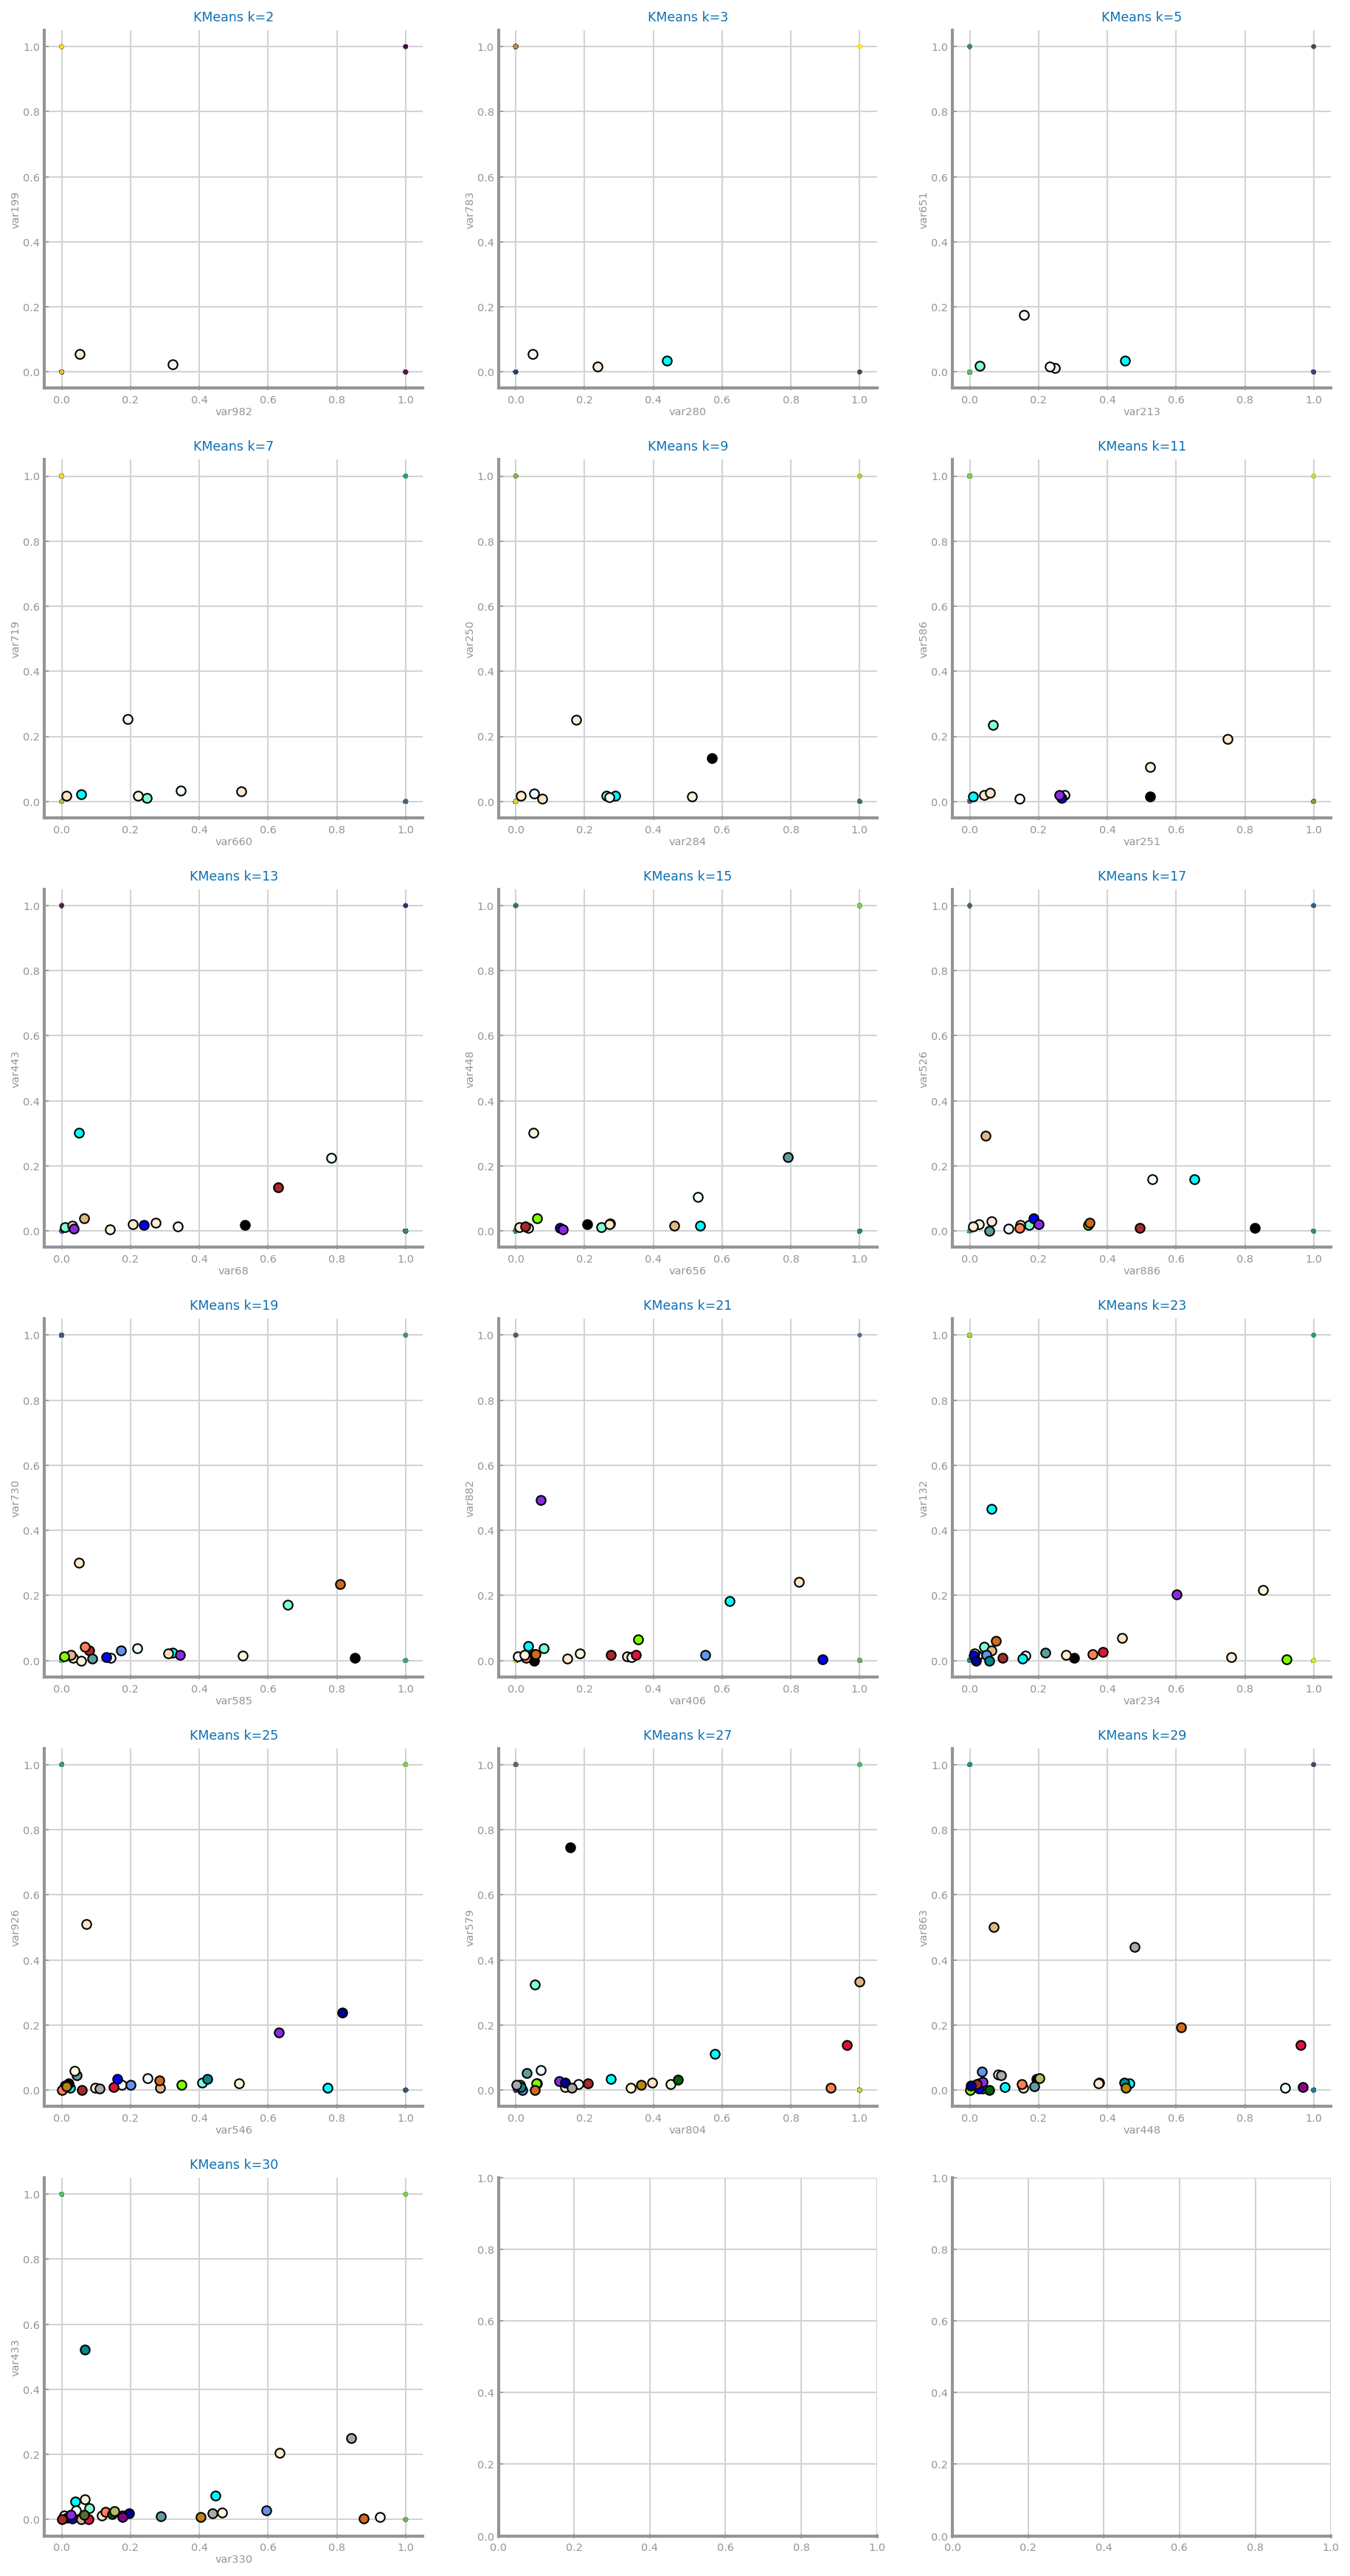

In [5]:
mse: list = []
sc: list = []
db: list = []
    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = KMeans(n_clusters=k)
    estimator.fit(data)
    mse.append(estimator.inertia_)
    sc.append(silhouette_score(data, estimator.labels_))
    db.append(davies_bouldin_score(data, estimator.labels_))

    
    v1 = random.randint(0, 1023) # Random v1
    v2 = random.randint(0, 1023) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, 1023)
    
    ds.plot_clusters(data, v2, v1, estimator.labels_.astype(float), estimator.cluster_centers_, k,
                     f'KMeans k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

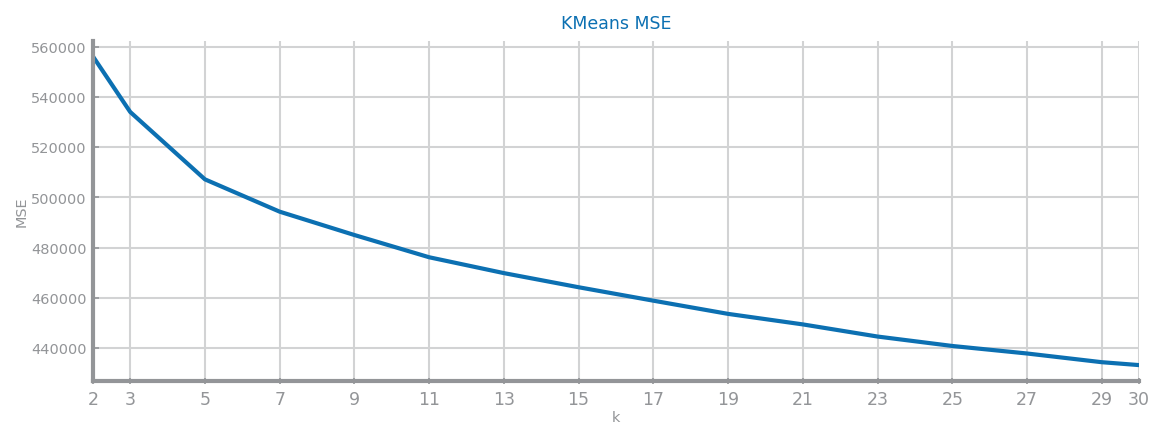

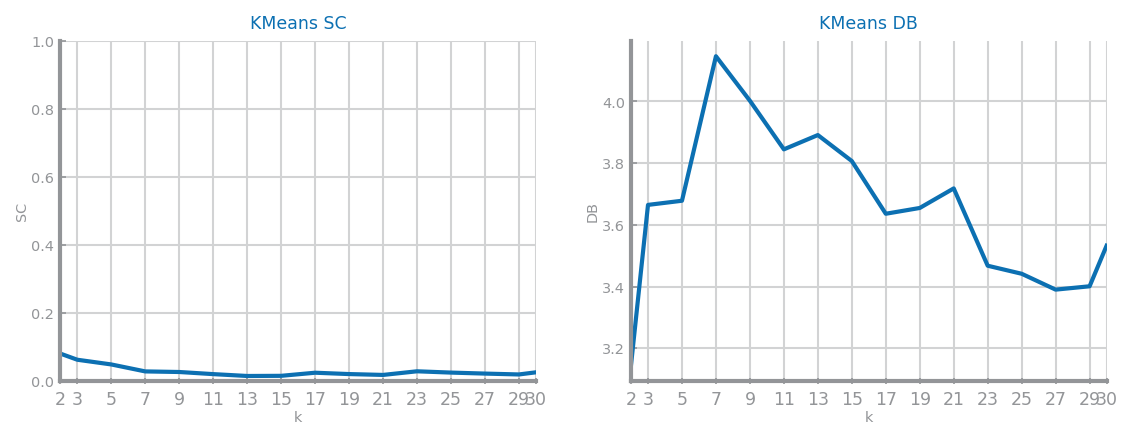

In [8]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='KMeans MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='KMeans SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='KMeans DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

### So...yeah this sucks

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Chi Feature Selection + Balancing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [10]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FChi_B.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


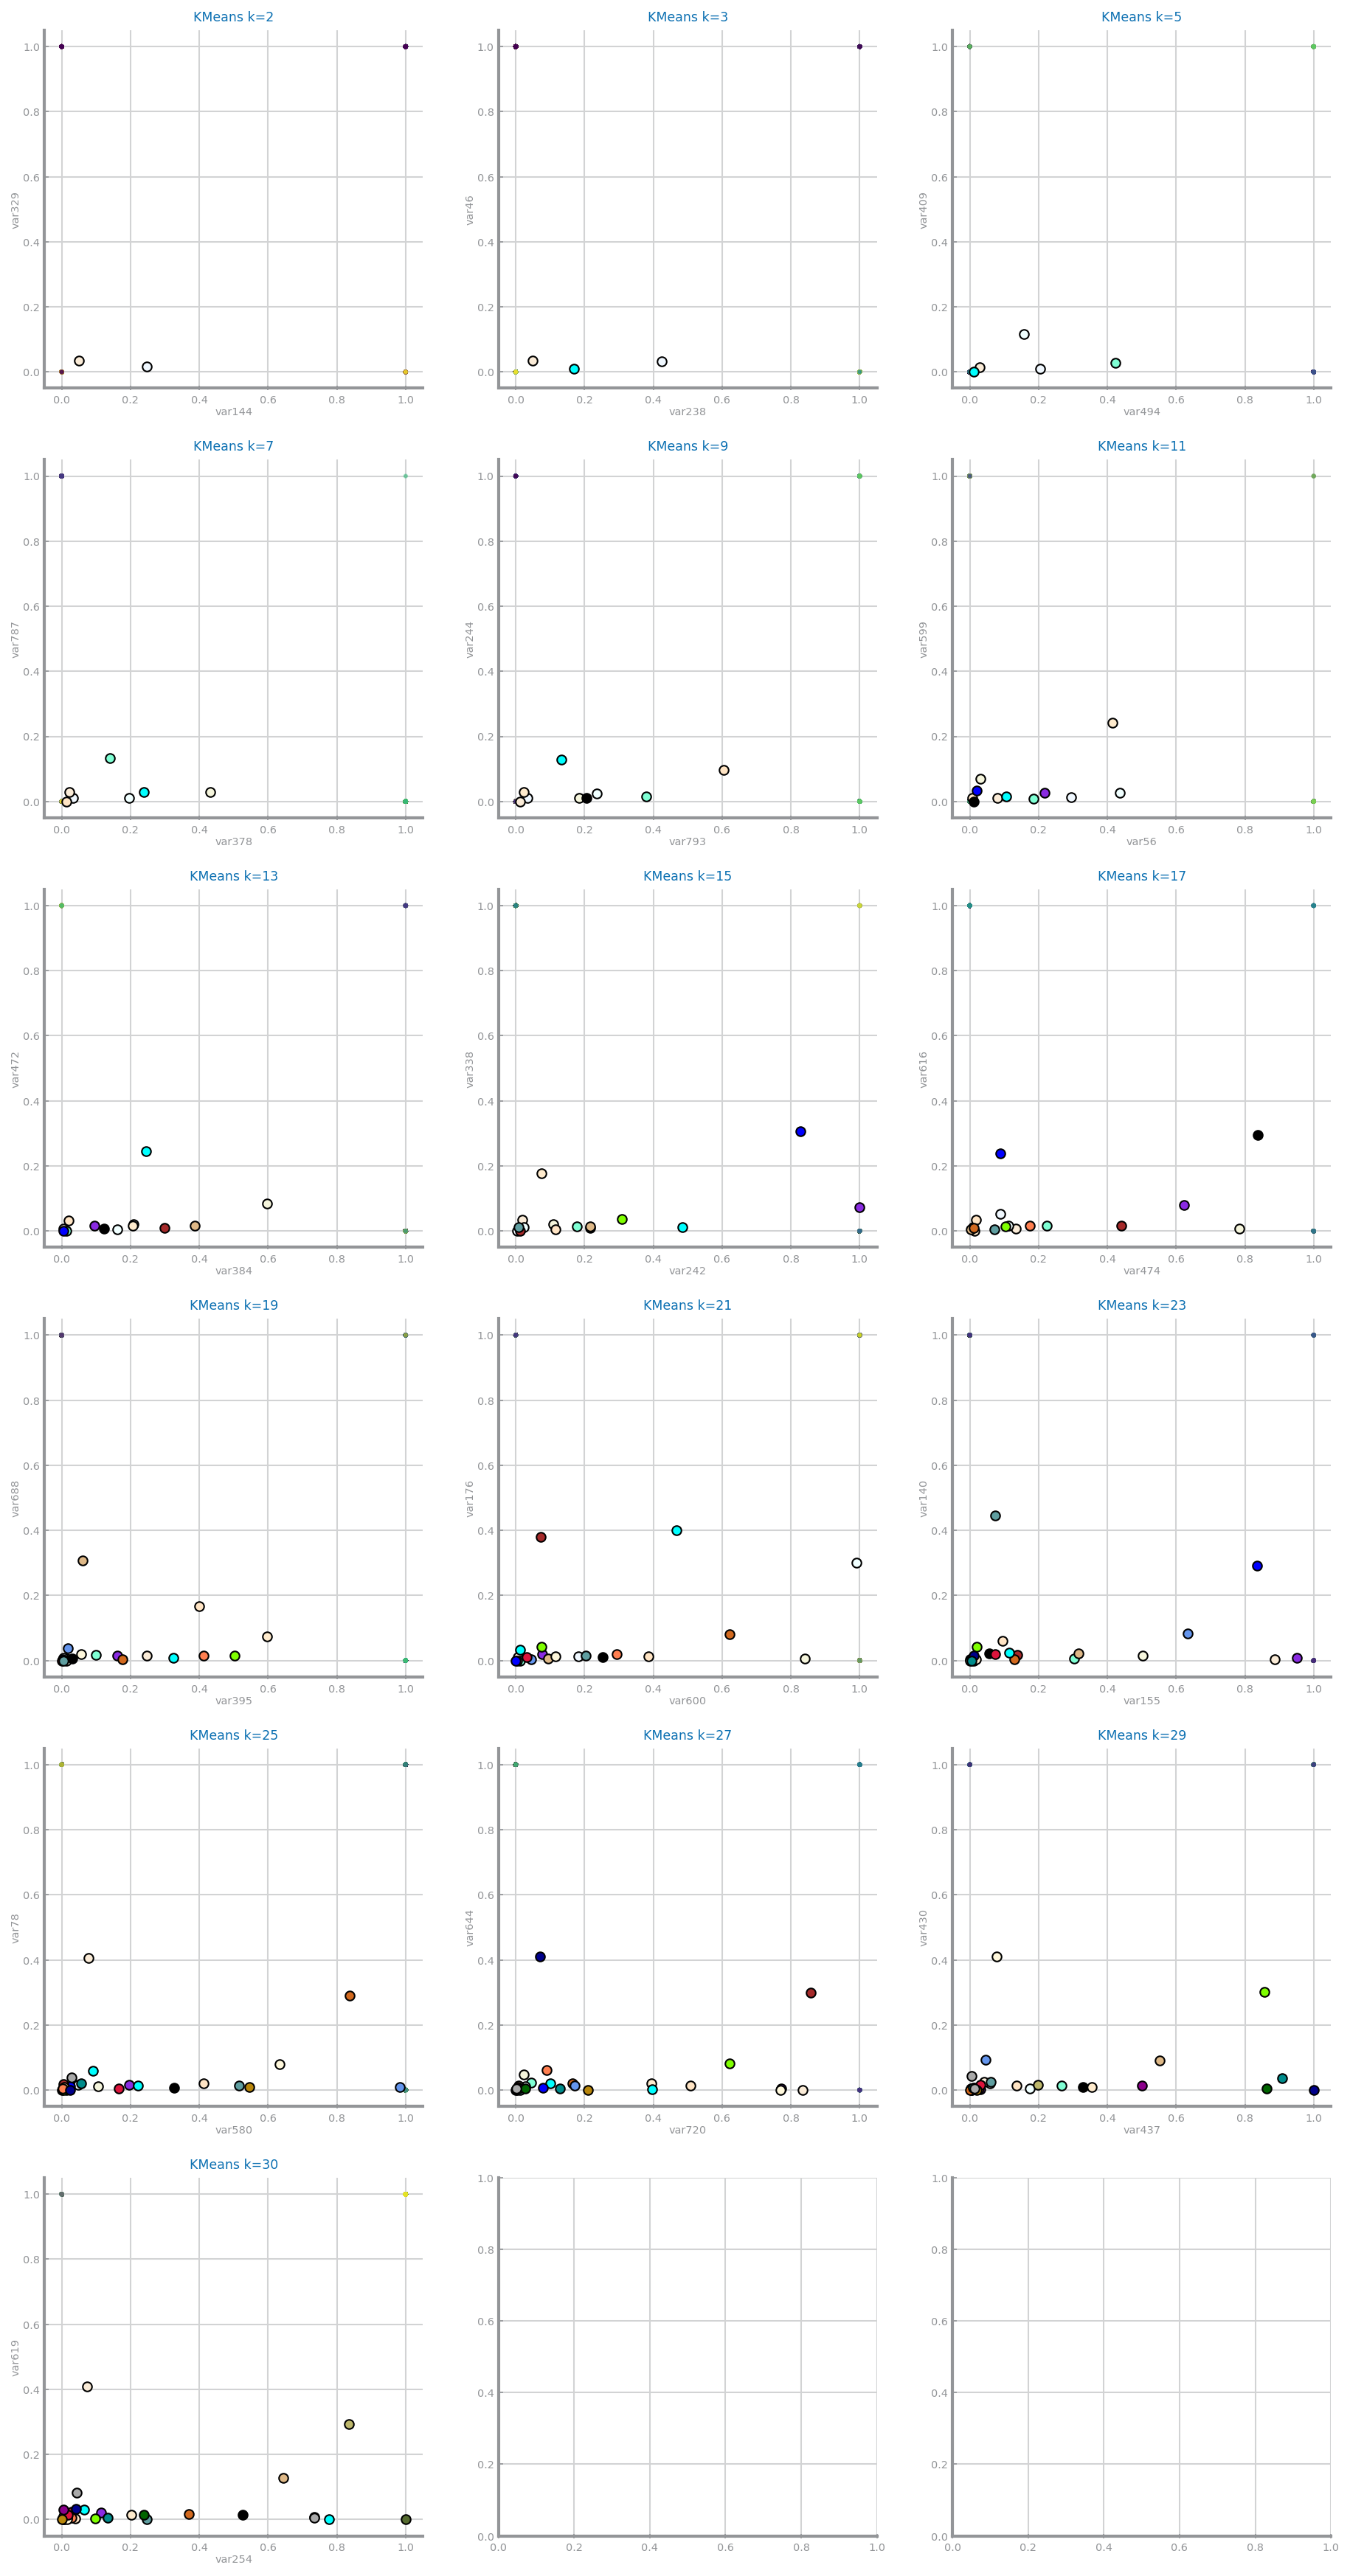

In [12]:
mse: list = []
sc: list = []
db: list = []
    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = KMeans(n_clusters=k)
    estimator.fit(data)
    mse.append(estimator.inertia_)
    sc.append(silhouette_score(data, estimator.labels_))
    db.append(davies_bouldin_score(data, estimator.labels_))

    
    v1 = random.randint(0, len(data.columns)) # Random v1
    v2 = random.randint(0, len(data.columns)) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns))
    
    ds.plot_clusters(data, v2, v1, estimator.labels_.astype(float), estimator.cluster_centers_, k,
                     f'KMeans k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

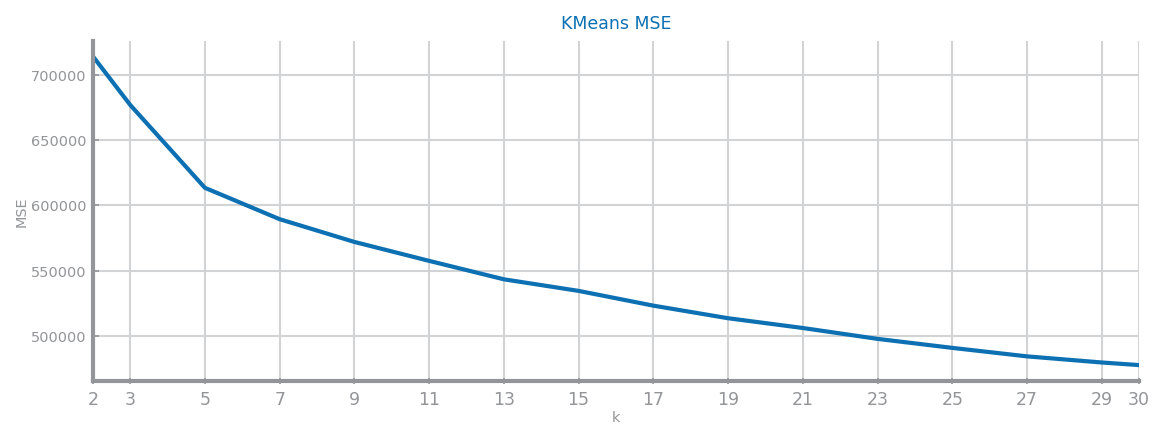

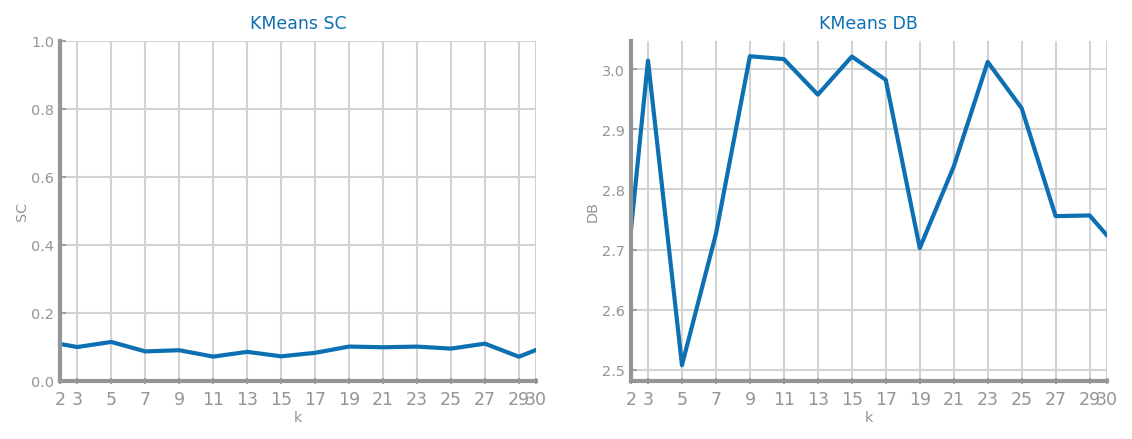

In [13]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='KMeans MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='KMeans SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='KMeans DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Reduced Chi Balanced

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [49]:
def bin_to_integer(bitlist):
    """Returns the integer conversion from a number represented in a binary string"""
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)

    return out

In [51]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_B_reduced32.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

for index, row in data.iterrows():
    for col in data.columns:
        data.at[index,col] = bin_to_integer(row[col])

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,33280,16384,288,8388608,0,784,4194306,8388608,4096,2097152,...,32768,1048600,128,0,0,65536,16384,532480,2105604,8388608
1,4227584,0,256,8388608,0,280,131074,0,0,2097152,...,32768,24,128,0,16384,65600,24576,532480,2367748,526336
2,33280,2048,256,8388608,0,33040,2,0,0,2097188,...,32768,24,0,0,0,65536,8404992,17309696,2109700,1572872
3,164352,0,256,8388608,0,272,2,4,0,2097152,...,34304,24,0,0,0,81928,16384,598016,2105604,525312
4,4608,16385,256,8519680,2,0,197634,4,0,2113536,...,262144,12582936,1,16384,0,65600,16384,32772,2105604,657408


K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


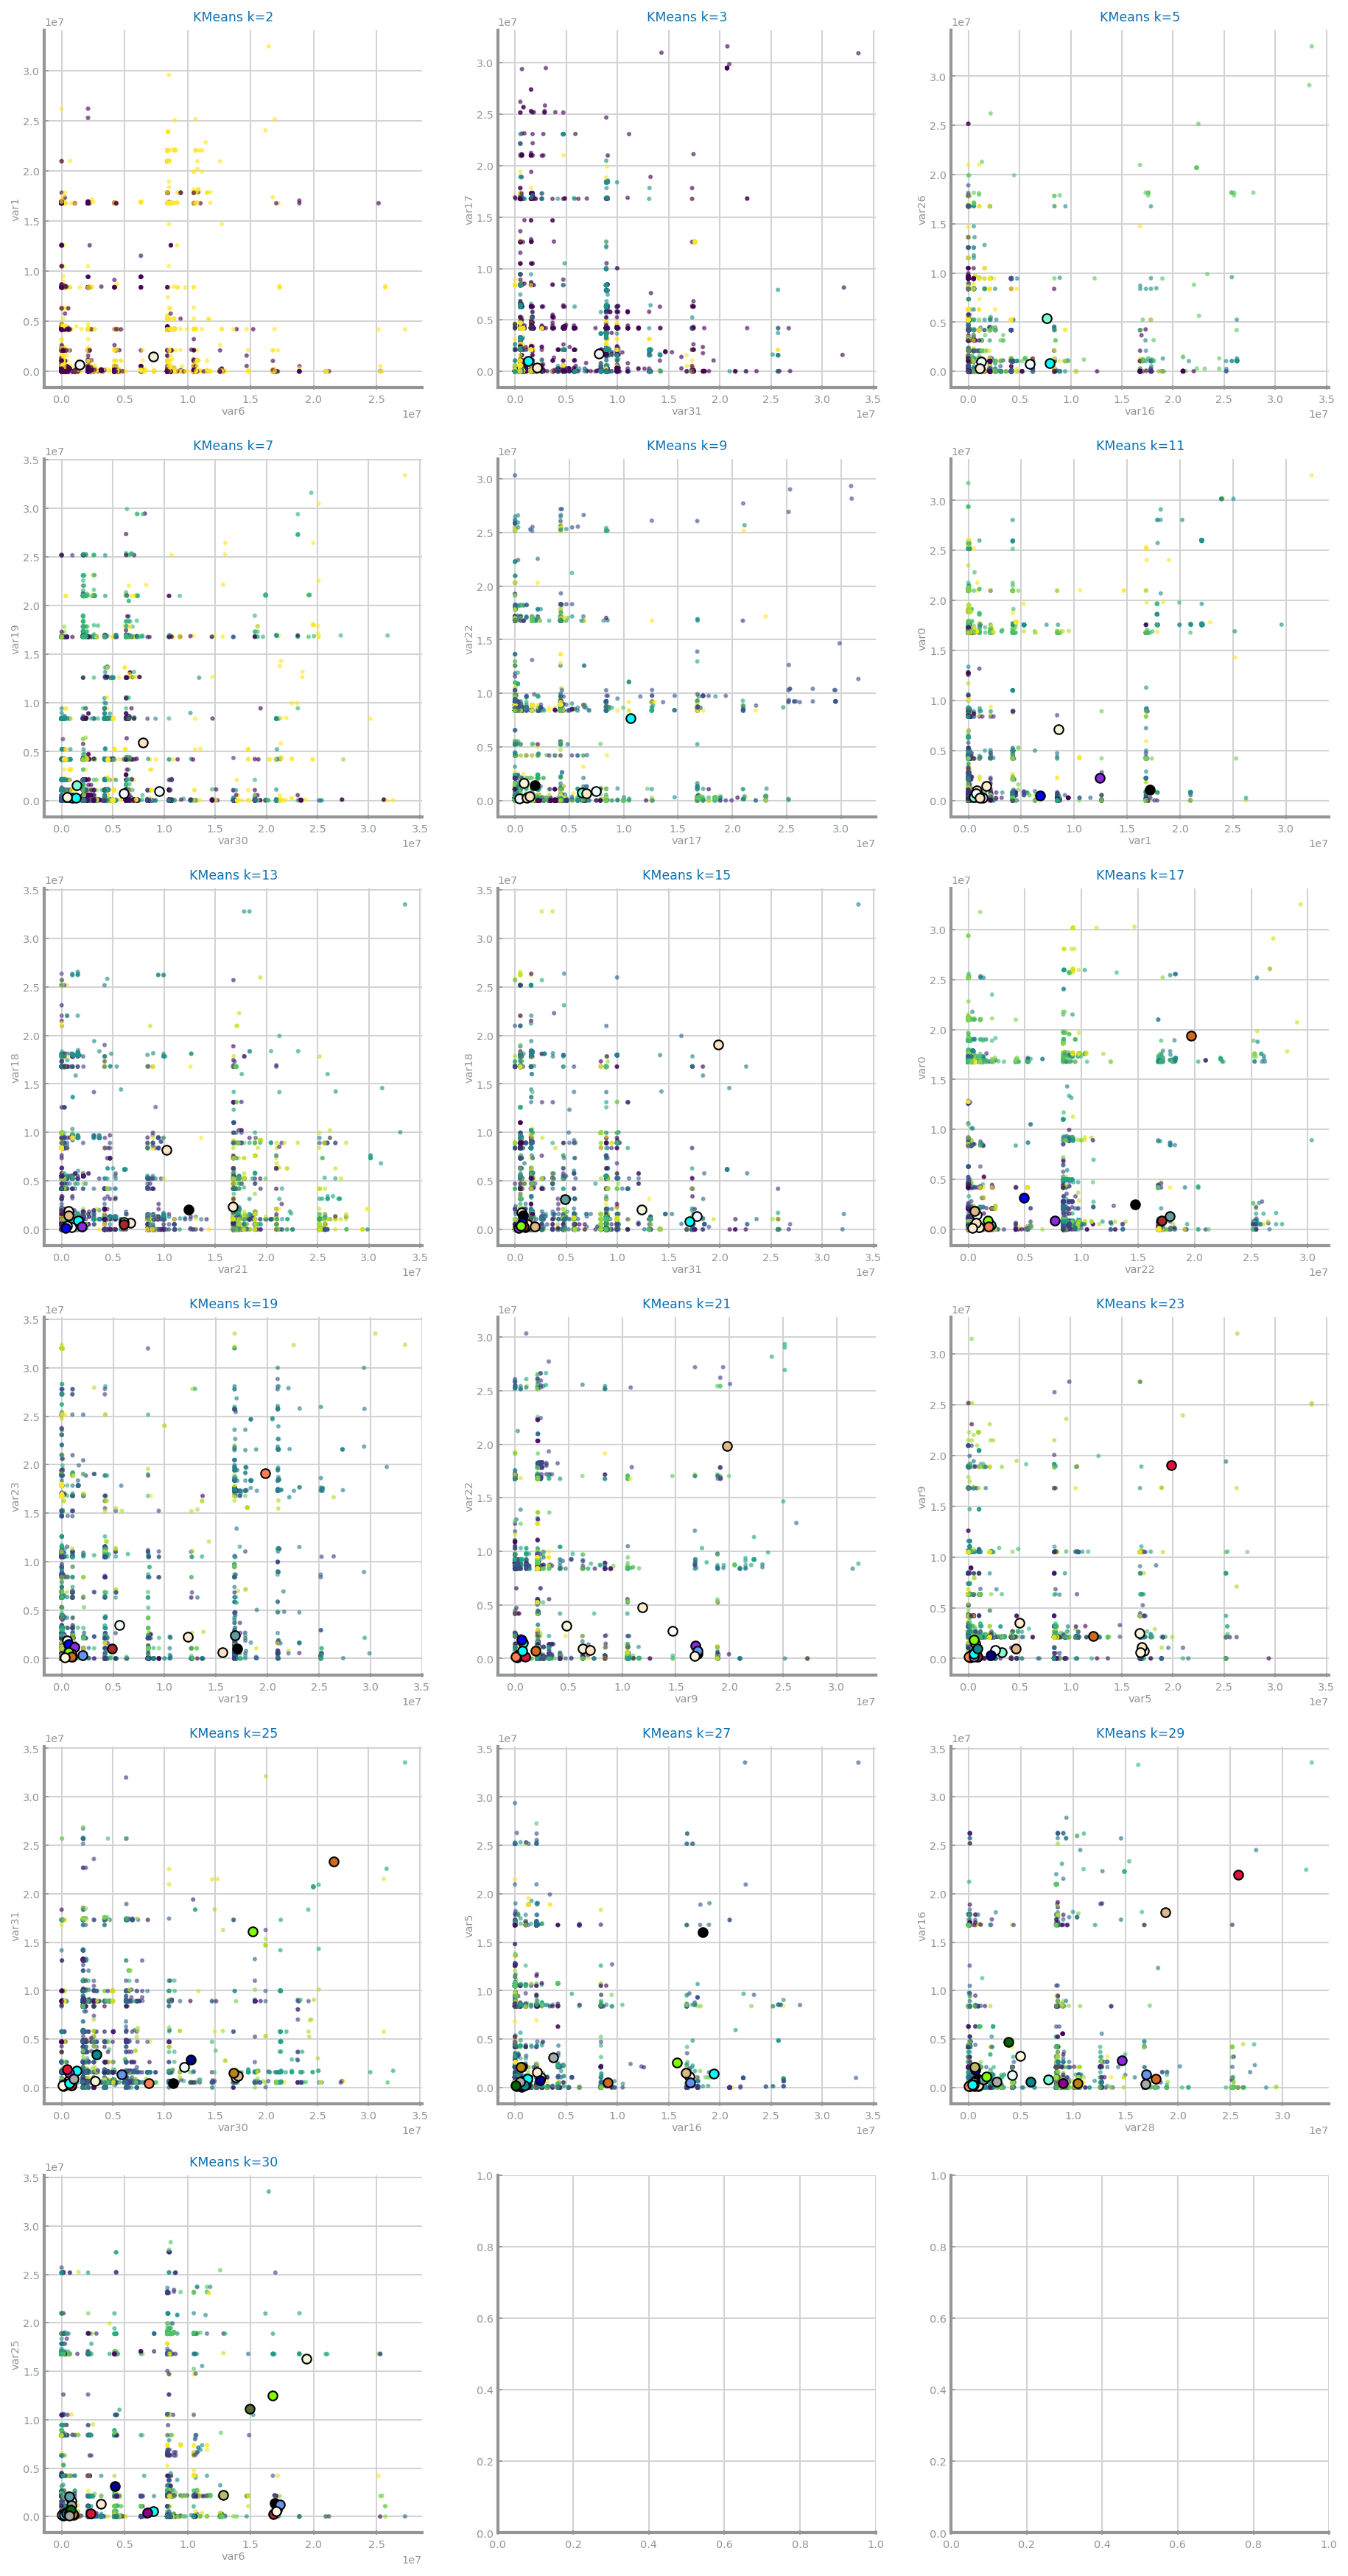

In [59]:
mse: list = []
sc: list = []
db: list = []
    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = KMeans(n_clusters=k)
    estimator.fit(data)
    mse.append(estimator.inertia_)
    sc.append(silhouette_score(data, estimator.labels_))
    db.append(davies_bouldin_score(data, estimator.labels_))

    
    v1 = random.randint(0, len(data.columns)) # Random v1
    v2 = random.randint(0, len(data.columns)) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns))
    
    try:
        ds.plot_clusters(data, v2, v1, estimator.labels_.astype(float), estimator.cluster_centers_, k,
                         f'KMeans k={k}', ax=axs[i,j])
    except Exception:
        ds.plot_clusters(data, v2, v1, estimator.labels_.astype(float), estimator.cluster_centers_, k,
                         f'KMeans k={k}', ax=axs[i,j])
        
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

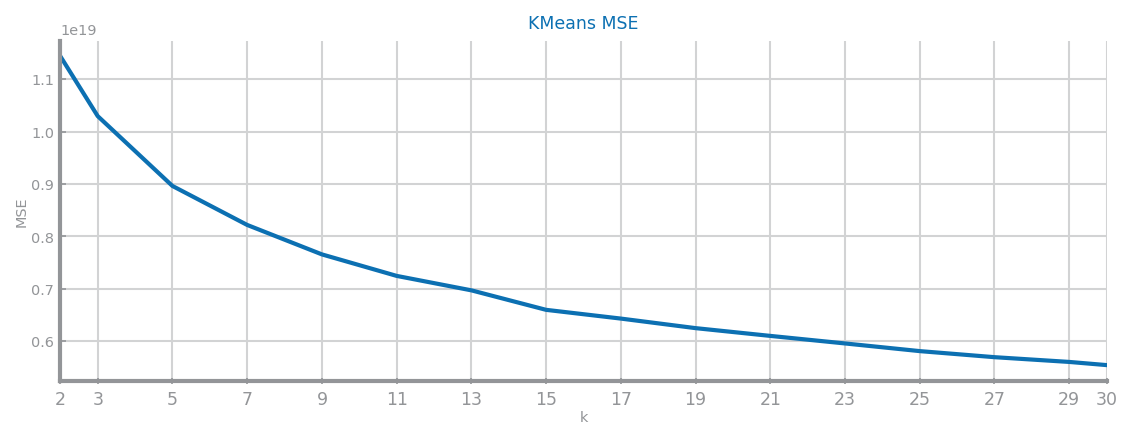

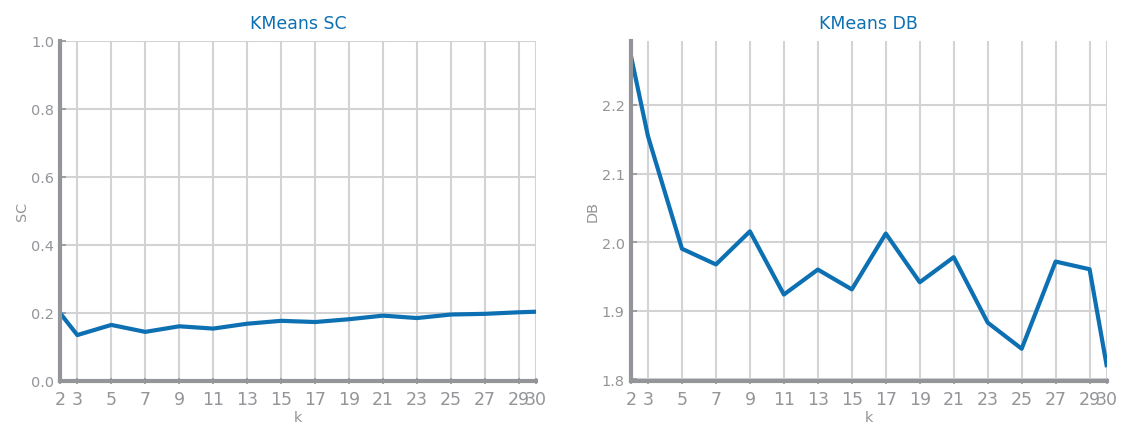

In [60]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='KMeans MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='KMeans SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='KMeans DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()